In [ ]:
install.packages("plyr")
install.packages("nclSLR", repos = "http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Loading the ISLR gene expression dataset (Ch10Ex11.csv)
filename = "/content/Ch10Ex11.csv"
gexpr = read.csv(filename, header=FALSE)
dim(gexpr)

[1] 1000   40

In [ ]:
# Traasnpose operation on the dataset as it is stored the "wrong" way for us
gexpr_t = t(gexpr)
dim(gexpr_t)

[1]   40 1000

In [ ]:
pca_gexpr = prcomp(x = gexpr_t)

The dataset consists of 40 tissue samples with measurements on 1,000 genes. We know that the frst 20 samples are from healthy patients, while the second 20 are from a from adiseased group

In [ ]:
# Assigning row names: 1 - 20 = healthy, 21 - 40 = disease
colnames(gexpr) <- rep(c("healthy", "disease"), each = 20)
colnames(gexpr)
rownames(gexpr_t) <- rep(c("healthy", "disease"), each = 20)
rownames(gexpr_t)

[1] "healthy" "healthy" "healthy" "healthy" "healthy" "healthy" "healthy"
 [8] "healthy" "healthy" "healthy" "healthy" "healthy" "healthy" "healthy"
[15] "healthy" "healthy" "healthy" "healthy" "healthy" "healthy" "disease"
[22] "disease" "disease" "disease" "disease" "disease" "disease" "disease"
[29] "disease" "disease" "disease" "disease" "disease" "disease" "disease"
[36] "disease" "disease" "disease" "disease" "disease"

[1] "healthy" "healthy" "healthy" "healthy" "healthy" "healthy" "healthy"
 [8] "healthy" "healthy" "healthy" "healthy" "healthy" "healthy" "healthy"
[15] "healthy" "healthy" "healthy" "healthy" "healthy" "healthy" "disease"
[22] "disease" "disease" "disease" "disease" "disease" "disease" "disease"
[29] "disease" "disease" "disease" "disease" "disease" "disease" "disease"
[36] "disease" "disease" "disease" "disease" "disease"

# Cluster Analysis

# 1. This question concerns hierarchical clustering.

## a) Apply hierarchical clustering with single-linkage using correlation-based distance and plot the dendrogram. Do the genes separate the samples into the two groups?

In [ ]:
# Computing correlation-based distance
r_gexpr = cor(gexpr)      # correlation
d_cor = 1- r_gexpr        # correlation distance matrix
d_cor = as.dist(d_cor)

In [ ]:
# Applying hierarchical clustering with single-linkage
hc_c = hclust(d_cor, method = "single")

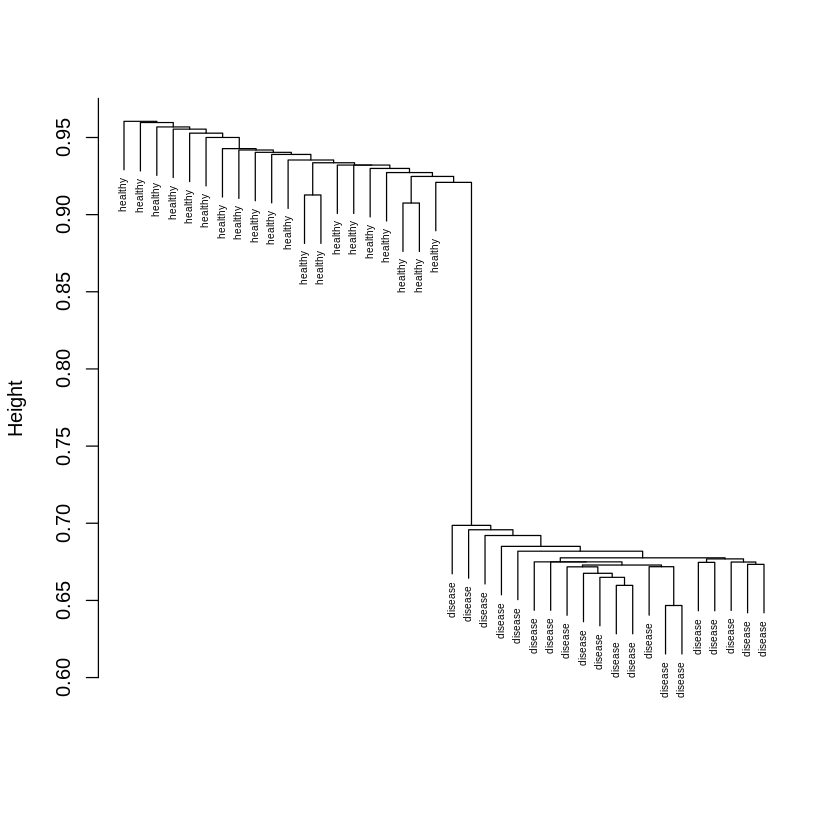

In [ ]:
# Plotting the dendogram
plot(hc_c, cex = 0.5, main = "", sub = "", xlab = "")

In [ ]:
# Cutting tree for checking if the genes separate the samples into the two groups
(hc_c_cut = cutree(hc_c, k = 2))

healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      1       1       1       1       1       1       1       1       1       1 
healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      1       1       1       1       1       1       1       1       2       1 
disease disease disease disease disease disease disease disease disease disease 
      1       1       1       1       1       1       1       1       1       1 
disease disease disease disease disease disease disease disease disease disease 
      1       1       1       1       1       1       1       1       1       1

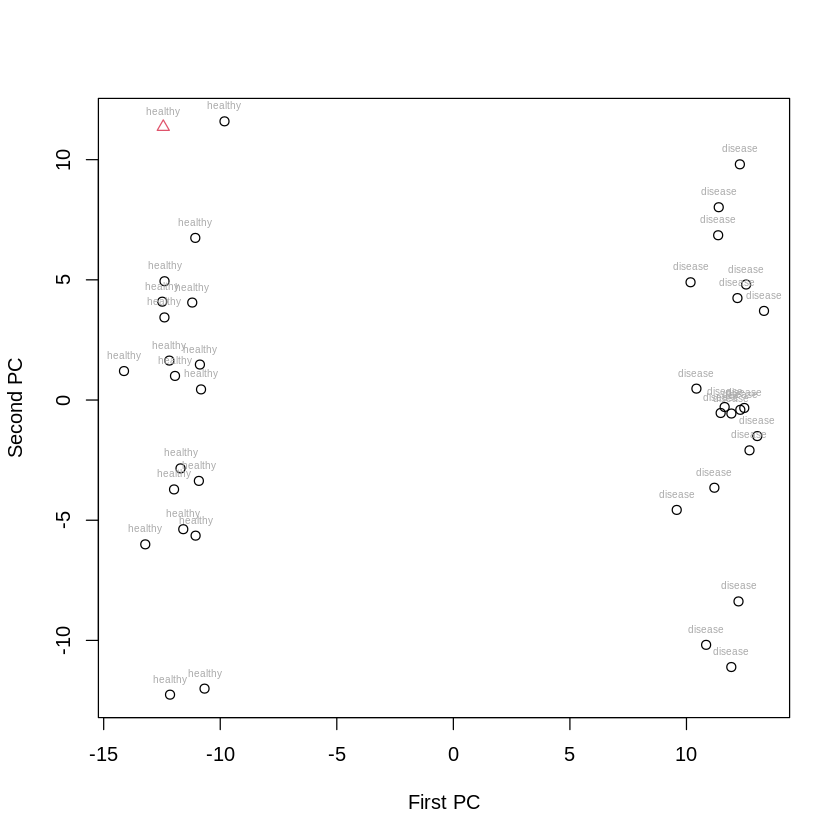

In [ ]:
# Plotting the first PC against the second PC using the cluster allocation to different colours (col) and plotting characters (pch) for each cluster:
plot(pca_gexpr$x[, 1], pca_gexpr$x[, 2], xlab = "First PC", ylab = "Second PC", col = hc_c_cut, pch = hc_c_cut)
## Add labels representing the groups:
text(pca_gexpr$x[, 1], pca_gexpr$x[, 2], labels = colnames(gexpr), cex = 0.5, pos = 3, col = "darkgrey")

From the above plot, we observe that the genes do not separate into two groups upon applying hierarchical clustering with single-linkage using correlation-based distance.

## b) Repeat 1(a) using complete-linkage and average-linkage. Do your results depend on the type of linkage used?

In [ ]:
# Applying hierarchical clustering with complete-linkage
hc_comp = hclust(d_cor, method = "complete")

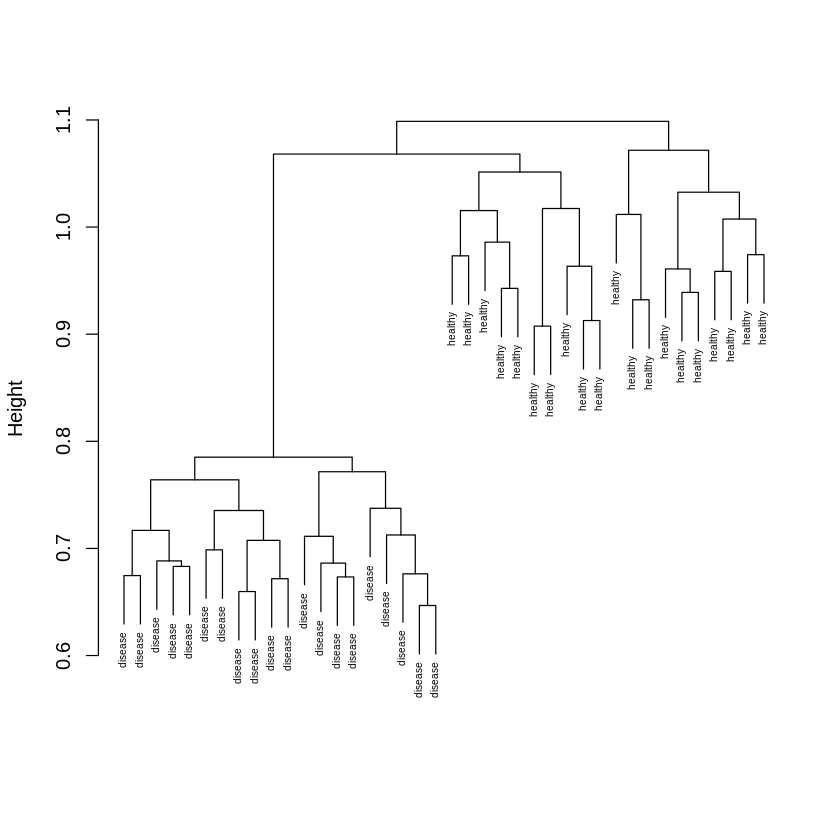

In [ ]:
# Plotting the dendogram for complete-linkage
plot(hc_comp, cex = 0.5, main = "", sub = "", xlab = "")

In [ ]:
# Cutting tree for checking if the genes separate the samples into the two groups
(hc_comp_cut = cutree(hc_comp, k = 2))

healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      1       2       1       1       2       1       2       1       2       2 
healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      1       1       2       1       1       2       2       2       2       1 
disease disease disease disease disease disease disease disease disease disease 
      2       2       2       2       2       2       2       2       2       2 
disease disease disease disease disease disease disease disease disease disease 
      2       2       2       2       2       2       2       2       2       2

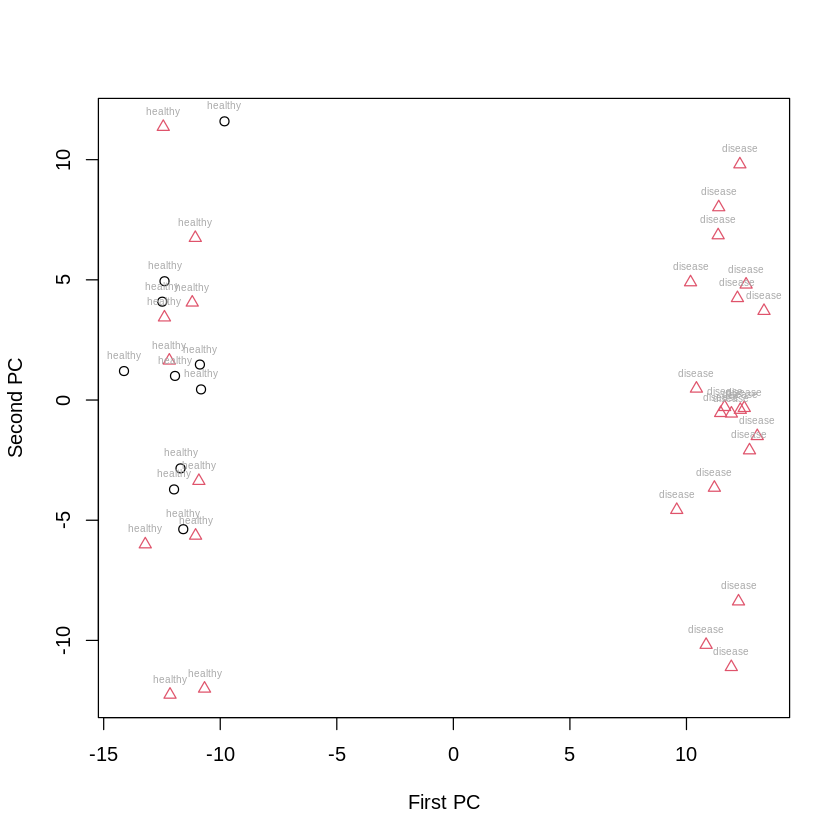

In [ ]:
# Plotting the first PC against the second PC using the cluster allocation to different colours (col) and plotting characters (pch) for each cluster:
plot(pca_gexpr$x[, 1], pca_gexpr$x[, 2], xlab = "First PC", ylab = "Second PC", col = hc_comp_cut, pch = hc_comp_cut)
## Add labels representing the groups:
text(pca_gexpr$x[, 1], pca_gexpr$x[, 2], labels = colnames(gexpr), cex = 0.5, pos = 3, col = "darkgrey")

In [ ]:
# Applying hierarchical clustering with average-linkage
hc_avg = hclust(d_cor, method = "average")

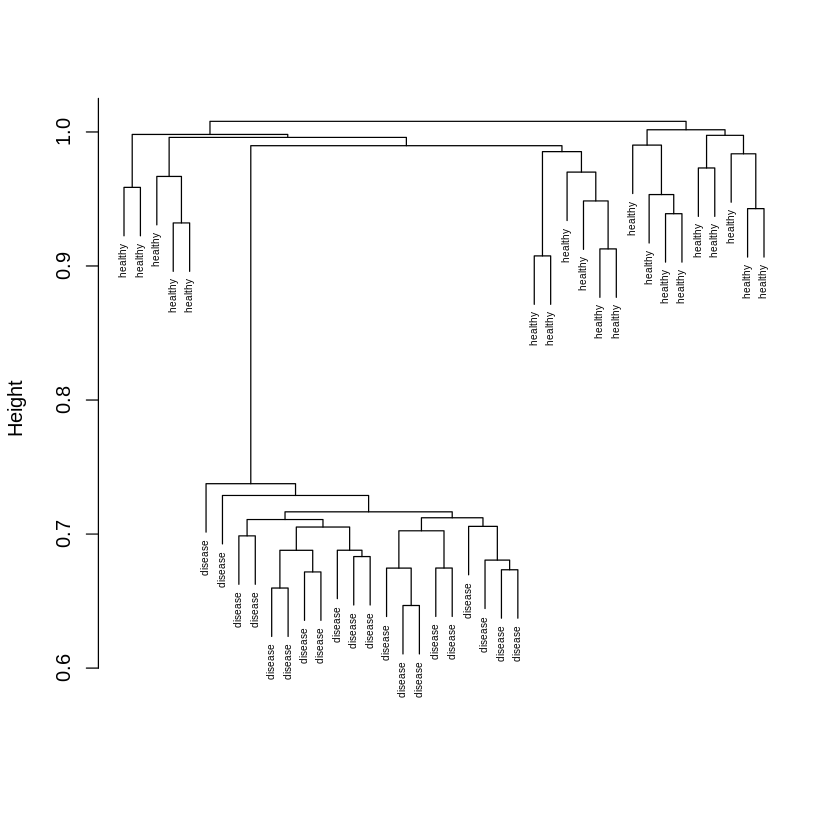

In [ ]:
# Plotting the dendogram for average-linkage
plot(hc_avg, cex = 0.5, main = "", sub = "", xlab = "")

In [ ]:
# Cutting tree for checking if the genes separate the samples into the two groups
(hc_avg_cut = cutree(hc_avg, k = 2))

healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      1       1       1       1       2       2       1       2       1       2 
healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      2       2       2       2       2       1       2       2       1       1 
disease disease disease disease disease disease disease disease disease disease 
      2       2       2       2       2       2       2       2       2       2 
disease disease disease disease disease disease disease disease disease disease 
      2       2       2       2       2       2       2       2       2       2

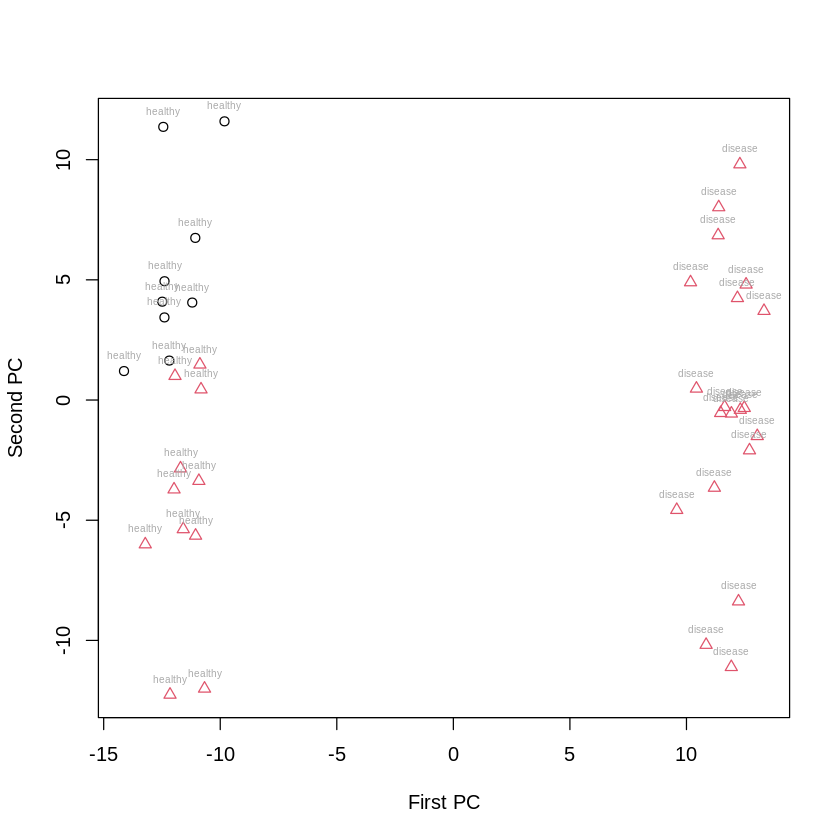

In [ ]:
# Plotting the first PC against the second PC using the cluster allocation to different colours (col) and plotting characters (pch) for each cluster:
plot(pca_gexpr$x[, 1], pca_gexpr$x[, 2], xlab = "First PC", ylab = "Second PC", col = hc_avg_cut, pch = hc_avg_cut)
## Add labels representing the groups:
text(pca_gexpr$x[, 1], pca_gexpr$x[, 2], labels = colnames(gexpr), cex = 0.5, pos = 3, col = "darkgrey")

From the plots above, we observe that although the results depend (improve) based on the type of linkage used, the genes do not completely separate into two groups.

# c) Repeat 1(a) with single-linkage using Euclidean distance. Do your results depend on the distance metric used?

In [ ]:
# Computing Euclidean
d_euc = dist(gexpr_t)

In [ ]:
# Applying hierarchical clustering with single-linkage
hc_euc = hclust(d_euc, method = "single")

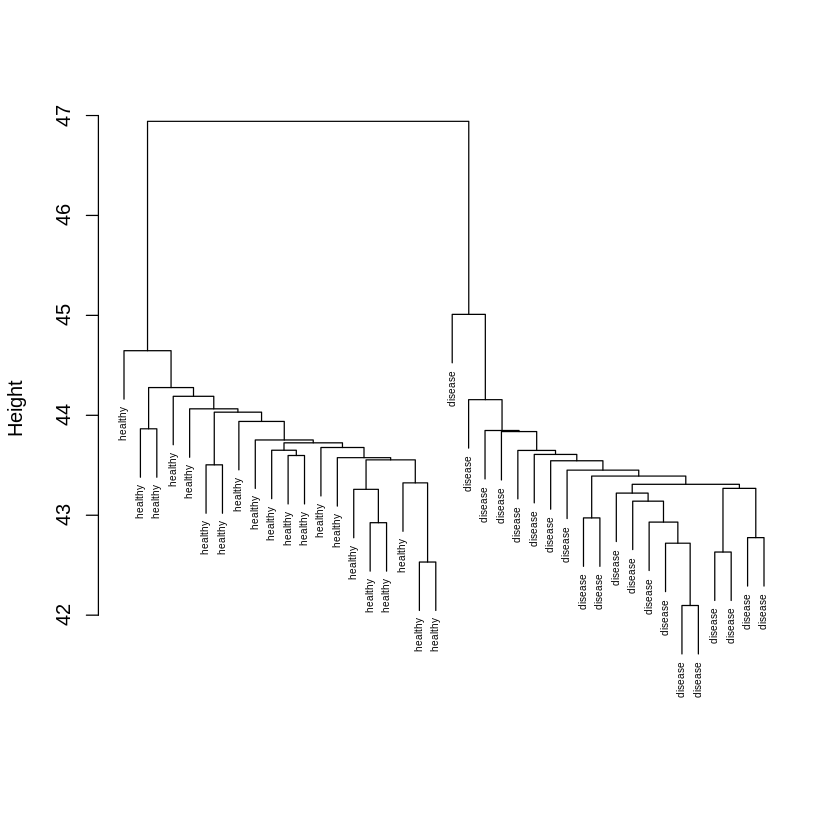

In [ ]:
# Plotting the dendogram
plot(hc_euc, cex = 0.5, main = "", sub = "", xlab = "")

In [ ]:
# Cutting tree for checking if the genes separate the samples into the two groups
(hc_euc_cut = cutree(hc_euc, k = 2))

healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      1       1       1       1       1       1       1       1       1       1 
healthy healthy healthy healthy healthy healthy healthy healthy healthy healthy 
      1       1       1       1       1       1       1       1       1       1 
disease disease disease disease disease disease disease disease disease disease 
      2       2       2       2       2       2       2       2       2       2 
disease disease disease disease disease disease disease disease disease disease 
      2       2       2       2       2       2       2       2       2       2

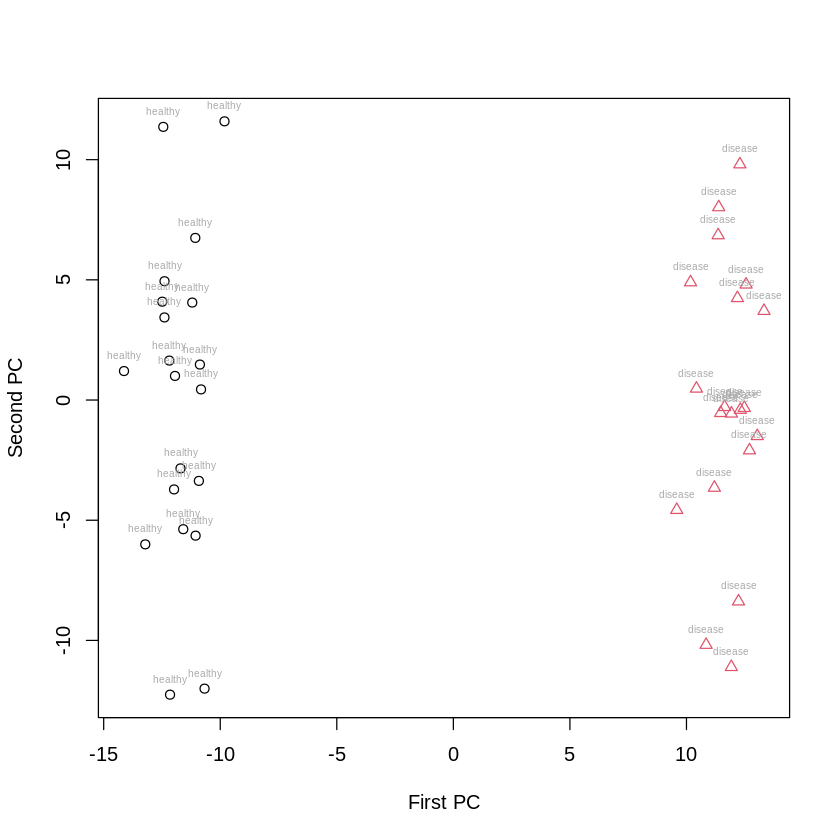

In [ ]:
# Plotting the first PC against the second PC using the cluster allocation to different colours (col) and plotting characters (pch) for each cluster:
plot(pca_gexpr$x[, 1], pca_gexpr$x[, 2], xlab = "First PC", ylab = "Second PC", col = hc_euc_cut, pch = hc_euc_cut)
## Add labels representing the groups:
text(pca_gexpr$x[, 1], pca_gexpr$x[, 2], labels = colnames(gexpr), cex = 0.5, pos = 3, col = "darkgrey")

From the above plot we observe that the results depend on the distance metric used. Compared to the correlation-based distance, Euclidean distance correctly separates the genes into two groups even with single-linkage.

# 2. This question concerns the K-means algorithm.

# a) Apply the K-means algorithm for a range of values of K. On the basis of this analysis, do the genes separate the samples into the two groups?

In [ ]:
# Max value of K
kmax = 8
#Vector to store the values of SSW for each value of K:
ssw = numeric(kmax)
# Loop over values of K from 1 to Kmax, extracting the value of SSW
for(k in 1:kmax) {
  km = kmeans(gexpr_t, k, iter.max = 50, nstart = 20)
  ssw[k] = km$tot.withinss
}

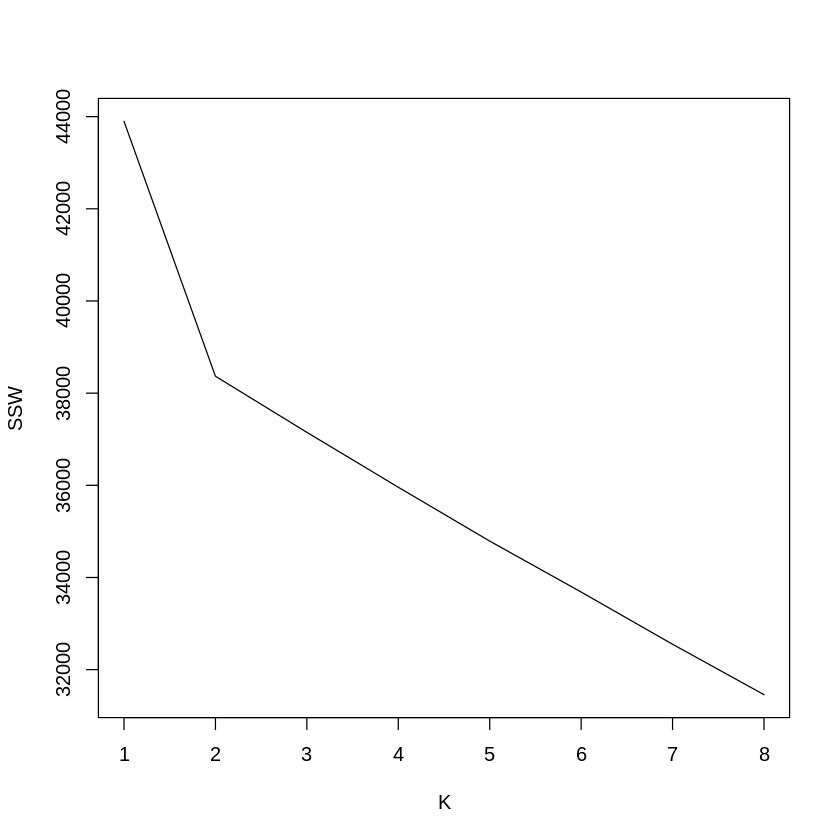

In [ ]:
# Plotting K vs SSW
plot(1:kmax, ssw, type = "l", xlab = "K", ylab = "SSW")

In [ ]:
# Getting clusters for k = 2 on the basis of the above plot
km_2 = kmeans(gexpr_t, 2, iter.max = 50, nstart = 20)

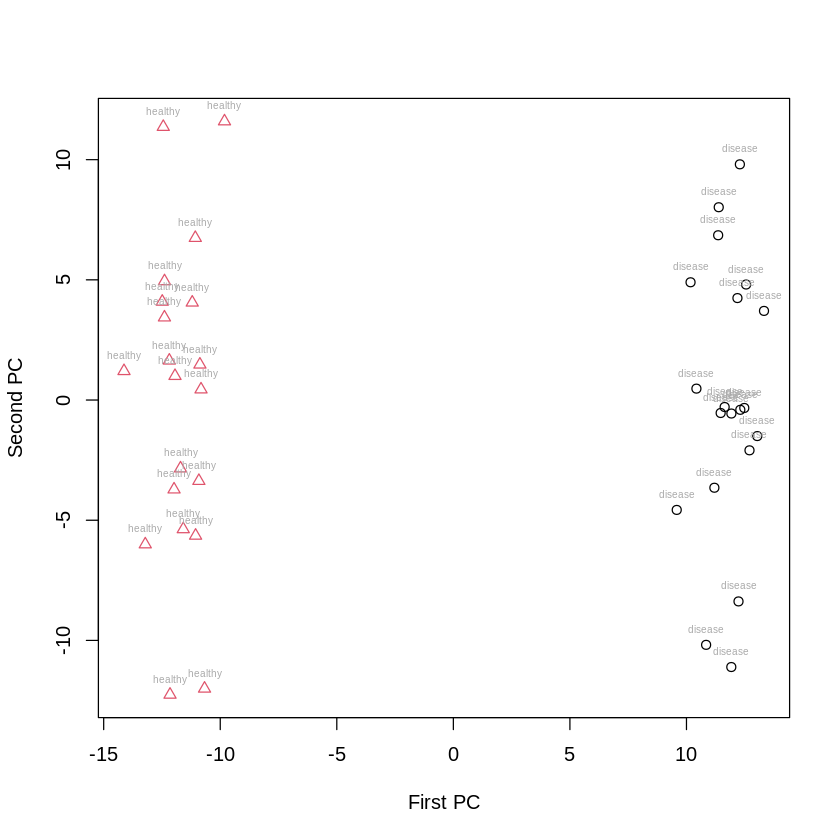

In [ ]:
# visual display of the two clusters in a two-dimensional plot
plot(pca_gexpr$x[, 1], pca_gexpr$x[, 2], xlab = "First PC", ylab = "Second PC", col = km_2$cluster, pch = km_2$cluster)
## Add labels representing the groups:
text(pca_gexpr$x[, 1], pca_gexpr$x[, 2], labels = rownames(gexpr_t), cex = 0.5, pos = 3, col = "darkgrey")

Applying K means algorith for a range of values of K, and plotting the SSW vs K values, we can observe that the optimum value for k is 2. From K = 2, we observe that the genes have separated the samples into two groups.

## b) Suppose we choose to use K = 4 clusters to summarise the data.1 Produce a visual display of the four clusters in a two-dimensional plot. Do the clusters appear well separated?

In [ ]:
# K means algorithm with 4 clusters (K = 4)
km_4 = kmeans(gexpr_t, 4, iter.max = 50, nstart = 20)

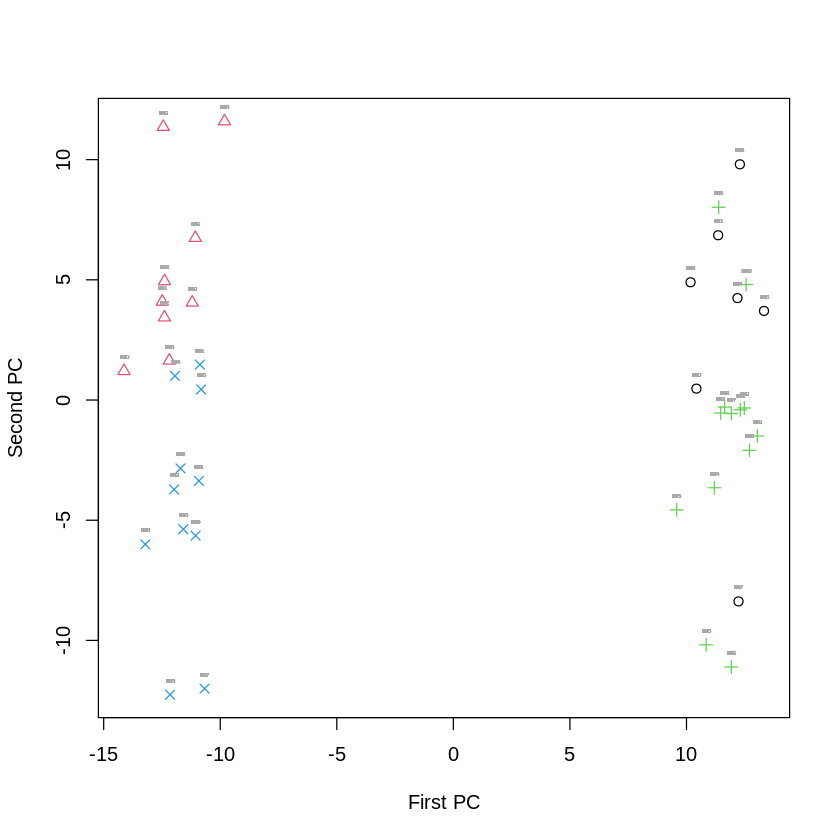

In [ ]:
# visual display of the four clusters in a two-dimensional plot
plot(pca_gexpr$x[, 1], pca_gexpr$x[, 2], xlab = "First PC", ylab = "Second PC", col = km_4$cluster, pch = km_4$cluster)
## Add labels representing the groups:
text(pca_gexpr$x[, 1], pca_gexpr$x[, 2], labels = rownames(gexpr), cex = 0.3, pos = 3, col = "darkgrey")

From the above plot of the four clusters we can observe that the clusters are not well separated.

# Linear Regression

In [ ]:
# getting the data package
if(!("nclSLR" %in% rownames(installed.packages()))){
  install.packages("plyr")
  install.packages("nclSLR", repos="http://R-Forge.R-project.org")
}

In [ ]:
# loading the package
library(nclSLR)

# loading the data
data(diabetes)

dim(diabetes)

head(diabetes, 3)

Loading required package: plyr


Attaching package: ‘nclSLR’


The following object is masked from ‘package:datasets’:

    USArrests




[1] 442  11

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,dis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.038075906,0.05068012,0.06169621,0.021872355,-0.044223498,-0.03482076,-0.04340085,-0.002592262,0.019908421,-0.01764613,151
2,-0.001882017,-0.04464164,-0.05147406,-0.026327835,-0.008448724,-0.01916334,0.07441156,-0.039493383,-0.068329744,-0.09220405,75
3,0.085298906,0.05068012,0.04445121,-0.005670611,-0.045599451,-0.03419447,-0.03235593,-0.002592262,0.002863771,-0.02593034,141


In [ ]:
# checking means and SD of explanatory variables
colMeans(diabetes[,1:10])

col_sd = apply(diabetes[,1:10], 2, sd)

age           sex           bmi           map            tc 
-3.653192e-16  1.288091e-16 -8.008723e-16  1.289911e-16 -9.112498e-17 
          ldl           hdl           tch           ltg           glu 
 1.301526e-16 -4.557682e-16  3.865922e-16 -3.861479e-16 -3.402226e-16

## (a) Split the data into a training and validation set. For the purposes of this assignment, take the data from the first 350 patients as training data and the data from the remaining 442 - 350 = 92 patients as test data.

In [ ]:
# splitting the data into training and test sets (setting indicies)
train_set <- rep(c(TRUE, FALSE), times = c(350, 92))

test_set = !train_set

In [ ]:
dim(diabetes[train_set,])

[1] 350  11

In [ ]:
dim(diabetes[test_set,])

[1] 92 11

## (b) Fit a multiple linear regression model (using all predictors) by least squares to the training data and compute the test error over the validation set. Report the test error.

In [ ]:
# fit multiple linear regression model (all predictors) by least squares on training data
lsq_train = lm(dis ~ ., data=diabetes[train_set,])

In [ ]:
# testing the model on testing data
yhat_test = predict(lsq_train, diabetes[test_set,])

In [ ]:
# computing the test error
(test_error = mean((diabetes[test_set, ]$dis - yhat_test)^2))

[1] 2842.256

We have the computed test error over validation/test set = 2842.26

## (c) In Practical 5, using best subset selection, we identified a 6-predictor model as providing a good compromise between model fit and model complexity. Fit this model to the training data using least squares and compute the test error over the validation set. Report the test error.

In [ ]:
# getting leaps library for best subset selection (regsubset)
# getting the data package
if(!("leaps" %in% rownames(installed.packages()))){
  install.packages("leaps")
  }
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# number of rows in training data
(n = nrow(diabetes[train_set, ]))

# number of predictors
(p = ncol(diabetes)-1)

[1] 350

[1] 10

#### From practical 5 we have the following 6 variables as best subset
- sex
- bmi
- map
- tc
- ldl
- ltg

In [ ]:
# fit least squares model with above 6 best subset variables on the training data
lsq_bss_train = lm(dis ~ ., data=diabetes[train_set, c("sex", "bmi", "map", "tc", "ldl", "ltg", "dis")])

In [ ]:
# testing the best subset model on testing data
yhat_bss_test = predict(lsq_bss_train, diabetes[test_set, c("sex", "bmi", "map", "tc", "ldl", "ltg", "dis")])

In [ ]:
# computing the test error for best subset
(test_bss_error = mean((diabetes[test_set, c("sex", "bmi", "map", "tc", "ldl", "ltg", "dis")]$dis - yhat_bss_test)^2))

[1] 2800.964

## (d) Ridge regression:

### (i) Based on the training data:

### I. Use cross-validation to identify an optimal value for the tuning parameter. Report the optimal value of the tuning parameter.

In [ ]:
# getting glmnet library for cross validation
# getting the data package
if(!("glmnet" %in% rownames(installed.packages()))){
  install.packages("glmnet")
  }
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-3



In [ ]:
# choosing grid values for tuning parameter
grid = 10^seq(5, -3, length = 100)

# ridge regression model
ridge_fit = glmnet(as.matrix(diabetes[train_set, 1:10]), as.matrix(diabetes[train_set, 11]), alpha = 0, standardize = FALSE, lambda = grid)

# using cross validation to identify optimal value for the tuning parameter
ridge_cv_fit = cv.glmnet(as.matrix(diabetes[train_set, 1:10]), as.matrix(diabetes[train_set, 11]), alpha = 0, standardize = FALSE, lambda = grid)

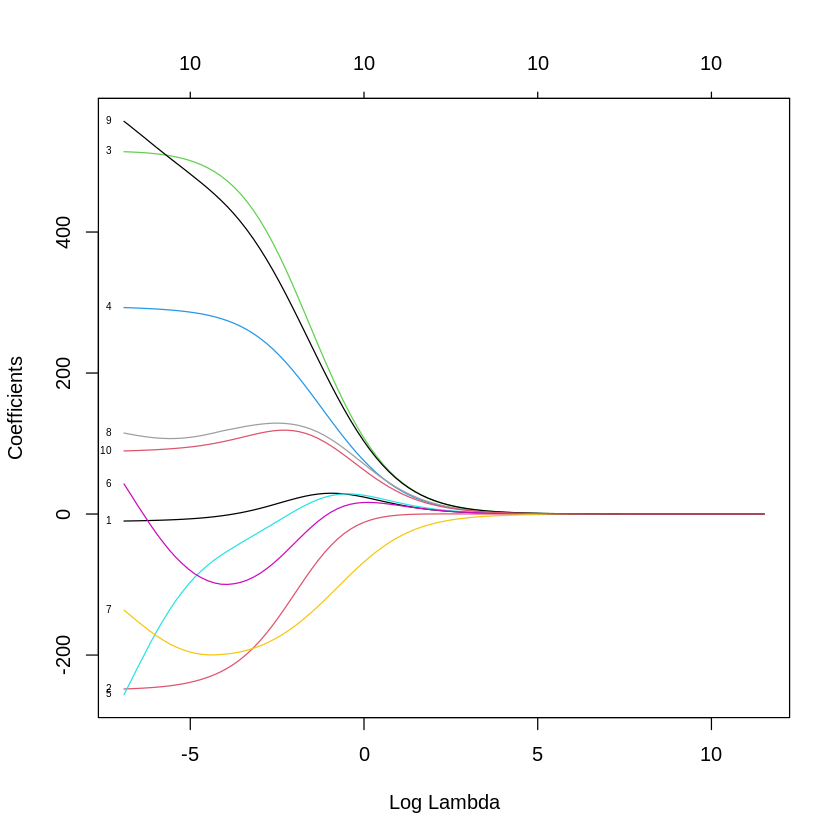

In [ ]:
# plotting ridge fit coefficient variation with lambda
plot(ridge_fit, xvar = "lambda", col = 1:10, label = TRUE)

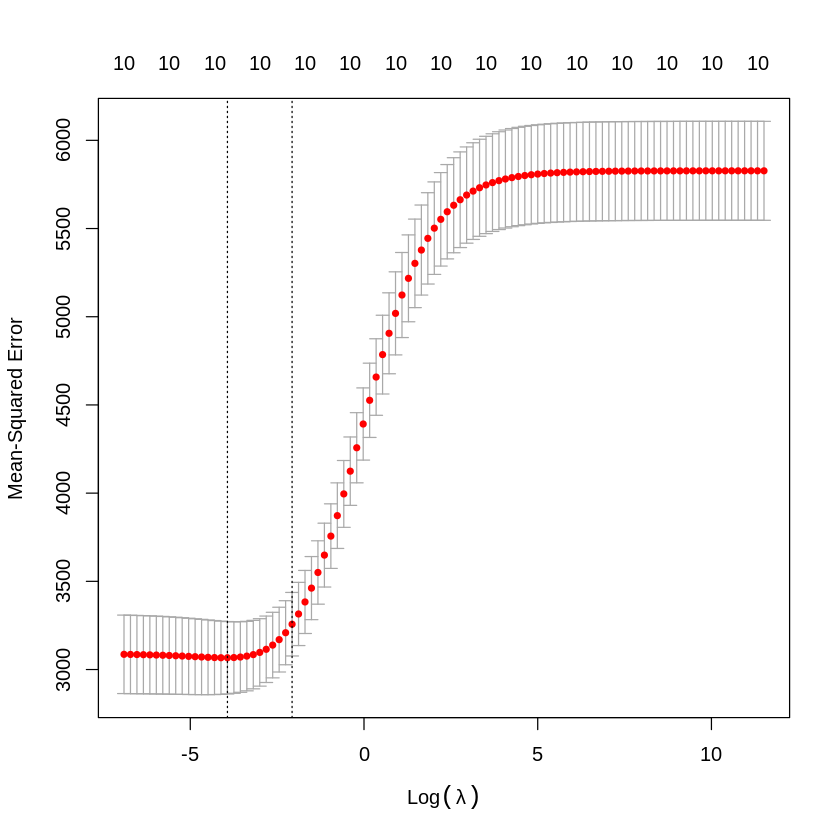

In [ ]:
# plotting cross validated error variation with lambda
plot(ridge_cv_fit)

In [ ]:
# Optimal value of the tuning parameter
(lambda_ridge_min = ridge_cv_fit$lambda.min)

[1] 0.01963041

#### We have, the cross validated computed optimal value of the tuning parameter is 0.0196304065004027

### II. With the tuning parameter fixed at its optimal value, fit the model to all the training data and compute the test error over the validation data. Report the test error.

In [ ]:
# fit model to all training data with lambda at optimal value
ridge_fit_optimal = glmnet(as.matrix(diabetes[train_set, 1:10]), as.matrix(diabetes[train_set, 11]), alpha = 0, standardize = FALSE, lambda = lambda_ridge_min)

In [ ]:
# testing the optimal lambda model on testing data
yhat_ridge_optimal_test = predict(ridge_fit_optimal, as.matrix(diabetes[test_set, 1:10]))

In [ ]:
# computing the test error for best subset
(test_bss_error = mean((diabetes[test_set, "dis"] - yhat_ridge_optimal_test)^2))

[1] 2925.129

In [ ]:
y = predict(ridge_fit, newx = as.matrix(diabetes[test_set, 1:10]), s = lambda_ridge_min)

In [ ]:
dim(as.matrix(diabetes[test_set, "dis"]))

dim(y)

[1] 92  1

[1] 92  1

In [ ]:
mean((as.matrix(diabetes[test_set, "dis"]) - y)^2)

[1] 2925.1

#### We have, the  test error for optimal value of the tuning parameter lambda is 2925.1288748461

### (i) Based on full data:

### I. Use cross-validation to identify an optimal value for the tuning parameter. Report the optimal value of the tuning parameter.

In [ ]:
# using cross validation to identify optimal value for the tuning parameter
ridge_cv_total_fit = cv.glmnet(as.matrix(diabetes[, 1:10]), as.matrix(diabetes[, 11]), alpha = 0, standardize = FALSE, lambda = grid)

# Optimal value of the tuning parameter
(lambda_ridge_total_min = ridge_cv_total_fit$lambda.min)

[1] 0.001

We have, the computed optimin value of lambda for the whole dataset is = 0.001

### II. Fit the model to all of the data and generate a plot which shows how the estimates of the regression coefficients change as the tuning parameter is increased. Note that this means you will have to fit the model for a range of values for the tuning parameter around its optimal value. Comment on the plot.

In [ ]:
# fit ridge regression model on the whole dataset
ridge_fit_total = glmnet(as.matrix(diabetes[, 1:10]), as.matrix(diabetes[, 11]), alpha = 0, standardize = FALSE, lambda = grid)


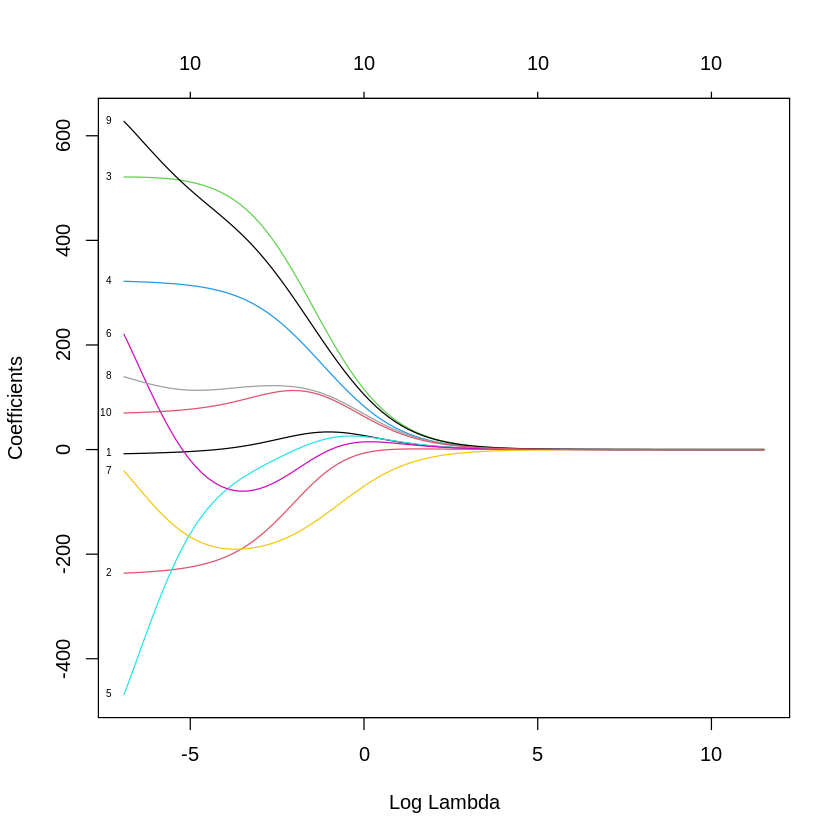

In [ ]:
# plotting regression coefficient variation with lambda
plot(ridge_fit_total, xvar = "lambda", col = 1:10, label = TRUE)

From the plot above, we have the following
-  For small value of lambda, the regression coefficients are a fair bit away from zero.
- As lambda increases, the regression coefficients get shrunk and pulled towards zero.

### III. Report the estimated regression coefficients for the model associated with the optimal value of the tuning parameter. How do they compare to the estimated coefficients in the full model fitted by least squares (see Practical 5 for parameter estimates)?

In [ ]:
# estimated regression coefficients for model with optimum lambda
coef(ridge_cv_total_fit, s = lambda_ridge_total_min)[, 1]

(Intercept)         age         sex         bmi         map          tc 
 152.133484   -8.036848 -236.348533  521.220228  321.762558 -468.699837 
        ldl         hdl         tch         ltg         glu 
 220.457336  -40.968299  139.235652  627.587343   69.898524

Coefficients:

variable    | Practical 5 | d-ii-iii
----------- | ----------- | ---------- 
(Intercept) | 152.133     | 152.133484162896
----------- | ----------- | ---------- 
age         | -10.012     | -8.03684820434751
----------- | ----------- | ---------- 
sex         | -239.819    | -236.348532818747
----------- | ----------- | ---------- 
bmi         | 519.840     | 521.220227505884
----------- | ----------- | ---------- 
map         | 324.390     | 321.762558035696
----------- | ----------- | ---------- 
tc          | -792.184    | -468.699836859793
----------- | ----------- | ---------- 
ldl         | 476.746     | 339.035    
----------- | ----------- | ---------- 
hdl         | 101.045     | -40.9682989838997
----------- | ----------- | ---------- 
tch         | 177.064     | 139.235652456487
----------- | ----------- | ---------- 
ltg         | 751.279     | 627.587342592403
----------- | ----------- | ---------- 
glu         | 67.625      | 69.8985244489739
----------- | ----------- | ---------- 

Cokmparing the ridge regression coefficients from optimum lambda with the regression coefficients from least squares from practical 5 we have the following:
- The intercept is unchanged.
- Coefficients for age, sex, map, tch and ltg have mild shrinkage have mild shrinkage.
- Coefficients for bmi and glu have mild increase in value.
- Coefficients for tc and ldl have significant shrinkage, about half.
- coefficient for hdl has shrunk and gone into -ve value.

## (e) Compare the test errors. Which model do you think is best and why?

From the above computations, we have the following:
- test error for least square fit is = 2842.26
- test error for least square fit with best subset selection from practical 5 is = 2800.96
- test error for ridge regression with optimal lambda is = 2918.40

From this we can conclude that based on the test error as a metric, the least square model is the best model as it results in predictions which are much closer to the actual value than the other two. Further, this model has less compoutation cost as it is using only 6 of the 10 predictive parameters.